In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import math
from sklearn.feature_extraction.text import CountVectorizer


# Download necessary NLTK packages
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

### Extraction Features

In [12]:
df = pd.read_csv("processed_data/Resume_proc_lemm.csv")

In [13]:
# Get a list of stop word
stop_words = set(nltk.corpus.stopwords.words('english'))

In [14]:
count_vect = CountVectorizer(
        lowercase=True,
        binary = False,
        max_features = 10000,
        stop_words = list(stop_words),          # TODO could be not useful, we already remove stop words in preprocess_text
        ngram_range=(1,6),                      # Considers unigrams and bigrams
        max_df = 0.8,                           # Ignores words appearing in more than 85% of documents (too common)
        min_df = 2                              # Keeps words appearing in at least 2 documents (filters rare words)
    )

In [15]:
resume_countvectorizer = count_vect.fit_transform(df['Resume_str'])

In [16]:
len(count_vect.vocabulary_)

10000

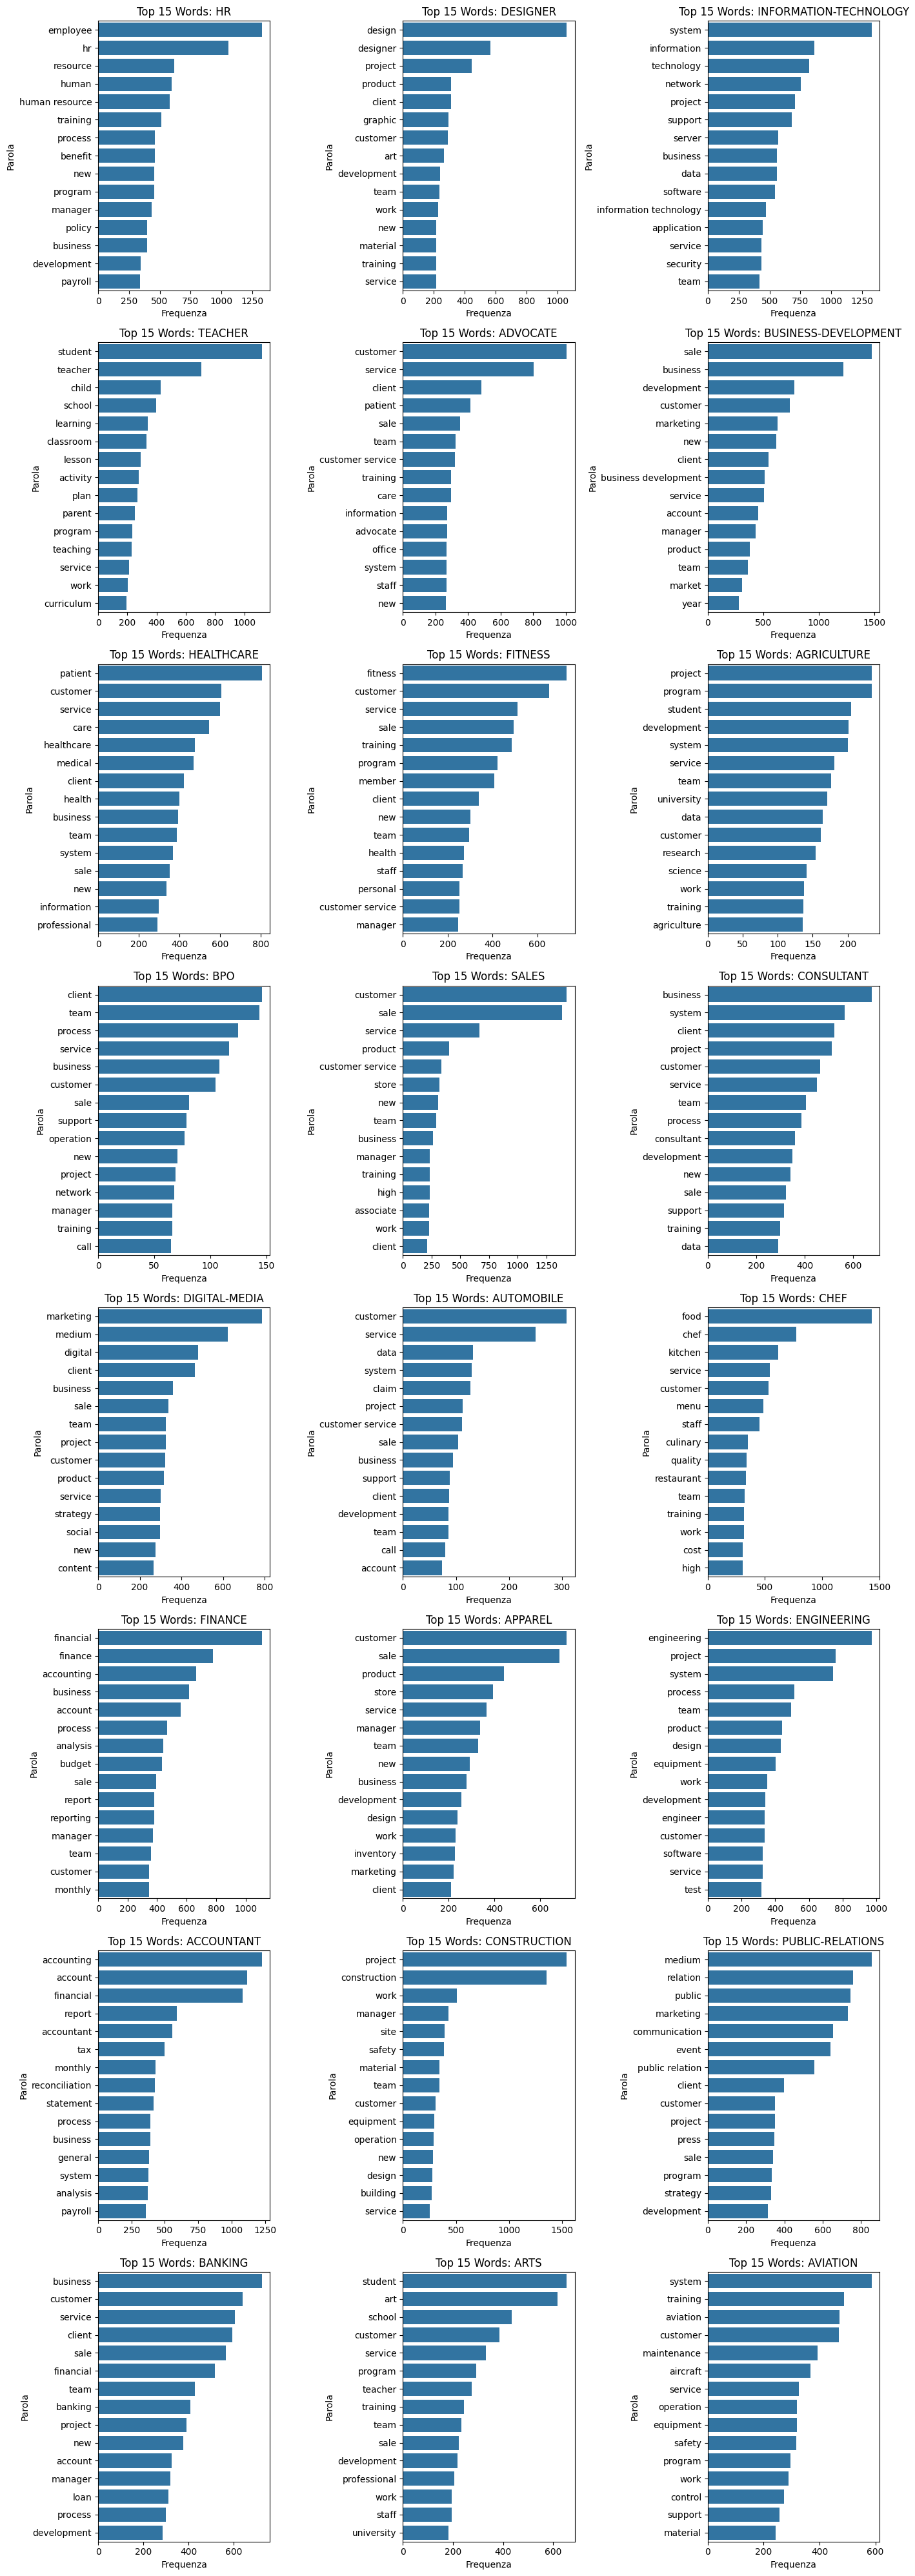

In [17]:

# 1. Recupera i nomi delle feature
feature_names = count_vect.get_feature_names_out()

# 2. Trasforma in DataFrame
resume_df = pd.DataFrame(resume_countvectorizer.toarray(), columns=feature_names)

# 4. Parametri
top_n = 15
categories = df['Category'].unique()
n = len(categories)

cols = 3
rows = math.ceil(n / cols)

# 5. Crea figura e assi
fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
axes = axes.flatten()

# 6. Per ogni categoria, crea il bar chart nello subplot
for idx, category in enumerate(categories):
    cat_df = resume_df[df['Category'] == category]
    word_freq = cat_df.sum().sort_values(ascending=False).head(top_n)

    sns.barplot(x=word_freq.values, y=word_freq.index, ax=axes[idx])
    axes[idx].set_title(f"Top {top_n} Words: {category}")
    axes[idx].set_xlabel("Frequenza")
    axes[idx].set_ylabel("Parola")

# 7. Disattiva subplot vuoti
for i in range(idx + 1, len(axes)):
    axes[i].axis('off')

# 8. Spaziatura tra le righe
plt.subplots_adjust(hspace=0.7)
plt.tight_layout()
plt.show()